In [41]:
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
# import tensorflow as tf
import pandas as pd



In [47]:
import pandas as pd
import glob

# Verzeichnis mit CSV-Dateien
file_path_pattern = r'..\..\..\data\attitude_roots_disapere\*.csv'

# Alle CSV-Dateien im Verzeichnis finden
csv_files = glob.glob(file_path_pattern)

# CSV-Dateien zu einem DataFrame kombinieren
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
df = combined_df[['text', 'aspect']]
df = df.rename(columns={'aspect': 'labels'})
df = df.rename(columns={'text': 'data'})
df = df.drop_duplicates(keep='first')



print(len(df))


9572


In [48]:
# data cleaning

df = df[df['data'].apply(lambda x: len(str(x).split()) >= 3)]
df =  df[df['labels'] != 'none']

#df['cleaned_text'] = df['data'].str.replace(r'^\[?\d+(\.\d+)?\]?\s*-?\s*', '', regex=True)
df

,data,labels
7,1. Why the color distribution of generated ima...,asp_clarity
9,"2. On Figure 6, which classes are outlying on ...",asp_clarity
10,3. While StyleGAN can not preserve geometry of...,asp_clarity
12,1. Pictures in Fig. 2 are mixed up between G(z...,asp_clarity
13,"2. In Fig. 2 edit(G(z, \alpha)) -> edit(G(z), ...",asp_clarity
...,...,...
9937,But there are no comparisons between the propo...,asp_meaningful-comparison
9939,The comparisons are also absent in experiments.,asp_meaningful-comparison
9940,"2.\tThe experimental data set is too small, wi...",asp_substance
9941,It is difficult to judge the performance of th...,asp_substance


In [49]:
# split train and test first
from sklearn.model_selection import train_test_split
import pandas as pd



# Aufteilen in Trainings- und Testdaten
df, test_df = train_test_split(df, test_size=0.15, random_state=42)
print(len(df))



4402


In [5]:
# from transformers import pipeline
# import pandas as pd

# paraphraser = pipeline("text2text-generation", model="t5-base", tokenizer="t5-base")

In [6]:
# def generate_similar_text(text):
#     try:
#         if not isinstance(text, str) or not text.strip():
#             raise ValueError("Input must be a non-empty string.")

#         # Generate paraphrased text with adjusted parameters for more variation
#         paraphrase = paraphraser(
#             text,
#             max_length=50,
#             num_return_sequences=1,
#             do_sample=True,  # Enable sampling for variability
#             top_k=50,        # Limit to top 50 probable words
#             top_p=0.95       # Cumulative probability threshold
#         )[0]['generated_text']
        
#         return paraphrase

#     except Exception as e:
#         print(f"Error generating paraphrase for: {text}. Error: {e}")
#         return text


In [51]:
# # Resample rows
#pd.set_option('display.max_colwidth', None)

# aspect_df = df[df["labels"] == "asp_originality"]
# resampled_aspect_df = aspect_df.sample(n=len(aspect_df) * 1, replace=True, random_state=42)
# #resampled_aspect_df["data"] = resampled_aspect_df["data"].apply(generate_similar_text)
# df = pd.concat([df, resampled_aspect_df], ignore_index=True)

# aspect_df = df[df["labels"] == "asp_clarity"]
# resampled_aspect_df = aspect_df.sample(n=len(aspect_df) * 1, replace=True, random_state=42)
# #resampled_aspect_df["data"] = resampled_aspect_df["data"].apply(generate_similar_text)
# df = pd.concat([df, resampled_aspect_df], ignore_index=True)

# aspect_df = df[df["labels"] == "asp_soundness-correctness"]
# resampled_aspect_df = aspect_df.sample(n=len(aspect_df) * 1, replace=True, random_state=42)
# #resampled_aspect_df["data"] = resampled_aspect_df["data"].apply(generate_similar_text)
# df = pd.concat([df, resampled_aspect_df], ignore_index=True)

# aspect_df = df[df["labels"] == "asp_motivation-impact"]
# resampled_aspect_df = aspect_df.sample(n=len(aspect_df) * 1, replace=True, random_state=42)
# #resampled_aspect_df["data"] = resampled_aspect_df["data"].apply(generate_similar_text)
# df = pd.concat([df, resampled_aspect_df], ignore_index=True)

# aspect_df = df[df["labels"] == "asp_meaningful-comparison"]
# resampled_aspect_df = aspect_df.sample(n=len(aspect_df) * 1, replace=True, random_state=42)
# #resampled_aspect_df["data"] = resampled_aspect_df["data"].apply(generate_similar_text)
# df = pd.concat([df, resampled_aspect_df], ignore_index=True)

aspect_df = df[df["labels"] == "asp_replicability"]
resampled_aspect_df = aspect_df.sample(n=len(aspect_df) * 1, replace=True, random_state=42)
print(resampled_aspect_df)
#resampled_aspect_df["data"] = resampled_aspect_df["data"].apply(generate_similar_text)
df = pd.concat([df, resampled_aspect_df], ignore_index=True)

aspect_df = df[df["labels"] == "arg_other"]
resampled_aspect_df = aspect_df.sample(n=len(aspect_df) * 1, replace=True, random_state=42)
#resampled_aspect_df["data"] = resampled_aspect_df["data"].apply(generate_similar_text)
df = pd.concat([df, resampled_aspect_df], ignore_index=True)

#df = all_df
df

                                                   data             labels
8591  - evaluation: only on toy tasks (which include...  asp_replicability
4212  Given this, I wonder why all experiments are c...  asp_replicability
8977  What is the purpose then for introducing the m...  asp_replicability
3331  5. It is recommended to evaluate the method on...  asp_replicability
8463  - Did the experiments on CIFAR-10 and ImageNet...  asp_replicability
...                                                 ...                ...
8591  - evaluation: only on toy tasks (which include...  asp_replicability
8066  The experimental settings, e.g. how the train:...  asp_replicability
8677  This work thus shows a modern GAN architecture...  asp_replicability
1836  -- While the overall claim of the paper in the...  asp_replicability
6960  How does the proposed method perform in more c...  asp_replicability

[249 rows x 2 columns]


,data,labels
0,- How do the paper estimate I(Z;Y) and I(Z;X) ...,asp_replicability
1,- The authors report only negative results for...,asp_substance
2,What is the performance on all of the other to...,asp_substance
3,The transfer metrics (MMD and kNN) are opaque ...,asp_soundness-correctness
4,"- ""work around"" -> ""workaround""",asp_clarity
...,...,...
4739,-- Consider using a standard fonts for the equ...,arg_other
4740,"I think it should be vice versa, N >> n",arg_other
4741,"A citation to ""Beyond BLEU:Training Neural Mac...",arg_other
4742,Missing references - authors may want to consi...,arg_other


In [8]:
# # Pfad zur .jsonl-Datei
# file_path = r'..\..\..\data\attitude_roots_disapere\disapere.txt' 

# # JSON-Lines-Datei in ein DataFrame laden
# df = pd.read_json(file_path, lines=True)
# df = df[['text', 'aspect']]
# df = df.rename(columns={'aspect': 'labels'})
# df = df.rename(columns={'text': 'data'})
# df = df.drop_duplicates(keep='first')
# print(df)

In [52]:
df["labels"].unique()

# Häufigkeit der Labels zählen
label_counts = df['labels'].value_counts()

print("Verteilung der Labels:")
print(label_counts)

print(len(df))


Verteilung der Labels:
labels
asp_substance                1424
asp_clarity                   921
asp_soundness-correctness     823
asp_replicability             498
asp_originality               323
asp_motivation-impact         310
asp_meaningful-comparison     259
arg_other                     186
Name: count, dtype: int64
4744


In [53]:
mapping_df = pd.DataFrame({
    'encoded_cat': range(len(df["labels"].astype("category").cat.categories)),
    'labels': df["labels"].astype("category").cat.categories
})

print(mapping_df)


mapping_df = pd.DataFrame({
    'encoded_cat': range(len(test_df["labels"].astype("category").cat.categories)),
    'labels': test_df["labels"].astype("category").cat.categories
})

print(mapping_df)

   encoded_cat                     labels
0            0                  arg_other
1            1                asp_clarity
2            2  asp_meaningful-comparison
3            3      asp_motivation-impact
4            4            asp_originality
5            5          asp_replicability
6            6  asp_soundness-correctness
7            7              asp_substance
   encoded_cat                     labels
0            0                  arg_other
1            1                asp_clarity
2            2  asp_meaningful-comparison
3            3      asp_motivation-impact
4            4            asp_originality
5            5          asp_replicability
6            6  asp_soundness-correctness
7            7              asp_substance


In [11]:
# mapping_df_test = test_df.DataFrame({
#     'encoded_cat': range(len(df["labels"].astype("category").cat.categories)),
#     'labels': df["labels"].astype("category").cat.categories
# })

# print(mapping_df)

In [54]:
#Encode label for easy identification.
df["encoded_cat"] = df["labels"].astype("category").cat.codes
train_texts = df["data"].to_list() # Features (not tokenized yet)
train_labels = df["encoded_cat"].to_list() # Labels

test_df["encoded_cat"] = test_df["labels"].astype("category").cat.codes
data_test_texts = test_df["data"].to_list() # Features (not tokenized yet)
data_test_labels = test_df["encoded_cat"].to_list() # Labels

In [13]:
# Data Split (train 79%, val 20%, test 1%)

from sklearn.model_selection import train_test_split
#  
# Split Train and Validation data
# train_texts, val_texts, train_labels, val_labels = train_test_split(data_test_texts, data_test_texts, test_size=0.2, random_state=0, shuffle=True)
 
# Keep some data for inference (testing)
test_texts, val_texts, test_labels, val_labels = train_test_split(data_test_texts, data_test_labels, test_size=0.1, random_state=0, shuffle=True)

In [55]:
print(len(train_texts))
print(len(val_texts))
print(len(test_texts))

print(val_labels)

4744
78
699
tf.Tensor(
[5 3 7 5 2 1 6 2 7 1 6 1 6 6 1 4 1 6 1 7 7 7 7 6 1 0 7 6 6 6 7 6 7 5 4 2 6
 7 1 7 6 7 7 6 6 7 1 6 7 0 7 1 7 7 7 7 6 1 7 5 5 7 6 6 7 1 7 1 1 1 0 7 7 0
 6 6 6 3], shape=(78,), dtype=int32)


In [59]:
import tensorflow as tf
#Daten tokenisieren
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=8)
 
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08)
model.compile(optimizer=optimizer, loss=model.hf_compute_loss, metrics=['accuracy'])

train_encodings = tokenizer(train_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [60]:
import tensorflow as tf

#Erstellen der TensorFlow-Datasets

# Konvertieren Sie die Labels in Tensoren
train_labels = tf.convert_to_tensor(train_labels)
test_labels = tf.convert_to_tensor(test_labels)

# Erstellen Sie TensorFlow-Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
))



In [ ]:
 
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='test_loss', patience=3, restore_best_weights=True)
 
# model.fit(
#     train_dataset.shuffle(1000).batch(16),
#     epochs=2,
#     batch_size=16,
#     test_data=test_dataset.shuffle(1000).batch(16),
#     callbacks=[early_stopping]
# )

SyntaxError: invalid syntax (1465886628.py, line 1)

In [61]:
# from tensorflow.keras.callbacks import EarlyStopping
 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
 
model.fit(
    train_dataset.shuffle(1000).batch(16),
    epochs=2,
    batch_size=16,
    validation_data=test_dataset.shuffle(1000).batch(16),
    callbacks=[early_stopping]
)

Epoch 1/2
297/297 [==============================] - 2945s 10s/step - loss: 1.5409 - accuracy: 0.4448 - val_loss: 1.5550 - val_accuracy: 0.4363
Epoch 2/2
297/297 [==============================] - 1579s 5s/step - loss: 1.0813 - accuracy: 0.6267 - val_loss: 1.5222 - val_accuracy: 0.4850


In [ ]:
save_directory = r"C:\Users\carme\OneDrive - Appelt Steuerberatung\Carmen Appelt\Master\Semester 3\DASP\models\roberta-base_multiclass_no_none_e2" 


In [22]:
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)


('C:\\Users\\carme\\OneDrive - Appelt Steuerberatung\\Carmen Appelt\\Master\\Semester 3\\DASP\\models\\roberta-base_multiclass_no_none\\tokenizer_config.json',
 'C:\\Users\\carme\\OneDrive - Appelt Steuerberatung\\Carmen Appelt\\Master\\Semester 3\\DASP\\models\\roberta-base_multiclass_no_none\\special_tokens_map.json',
 'C:\\Users\\carme\\OneDrive - Appelt Steuerberatung\\Carmen Appelt\\Master\\Semester 3\\DASP\\models\\roberta-base_multiclass_no_none\\vocab.txt',
 'C:\\Users\\carme\\OneDrive - Appelt Steuerberatung\\Carmen Appelt\\Master\\Semester 3\\DASP\\models\\roberta-base_multiclass_no_none\\added_tokens.json')

In [ ]:
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained(save_directory)

model = TFDistilBertForSequenceClassification.from_pretrained(save_directory, num_labels=8)
 
# optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08)
# model.compile(optimizer=optimizer, loss=model.hf_compute_loss, metrics=['accuracy'])

# tokenizer = RobertaTokenizer.from_pretrained(save_directory, from_pt=True)
# model = TFRobertaForSequenceClassification.from_pretrained(save_directory, from_pt=True)

In [104]:
def predict_category(text):
    predict_input = tokenizer.encode(text,
    truncation=True,
    padding=True,
    return_tensors="tf")
    output = model(predict_input)[0]
    prediction_value = tf.argmax(output, axis=1).numpy()[0]
    return prediction_value

In [100]:
def predict_category(text, thresholds):
    predict_input = tokenizer.encode(
        text,
        truncation=True,
        padding=True,
        return_tensors="tf"
    )
    output = model(predict_input)[0]
    probabilities = tf.nn.softmax(output, axis=1).numpy()[0]
    prediction_value = np.argmax(probabilities)
    max_prob = probabilities[prediction_value]
    
    if max_prob >= thresholds[prediction_value]:
        print("yes")
        return prediction_value
    else:
        return tf.argmax(output, axis=1).numpy()[0]


In [ ]:
# val_labels[0]
# val_texts

In [70]:
len(test_labels)

699

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

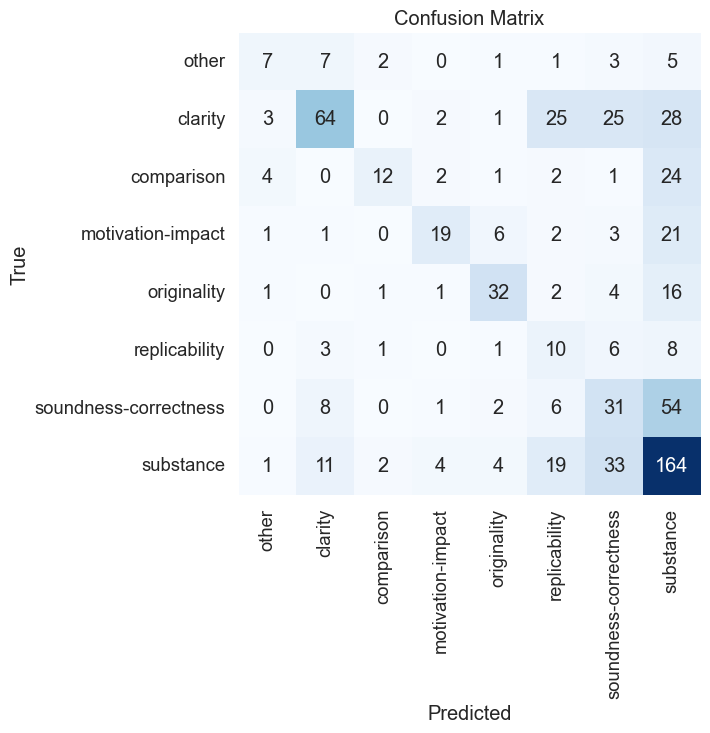

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

class_thresholds = [0.3, 0.2, 0.25, 0.5, 0.45, 0.5, 0.01, 0.95]

pred = []
x=1
for v, y in zip(test_texts, test_labels):
    x = x+1
    print(x)
    #print(predict_category(v, class_thresholds), "true: ", y)
    pred.append(predict_category(v))


confusion = confusion_matrix(test_labels, pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
xticklabels=["other", "clarity", "comparison", "motivation-impact", "originality", "replicability", "soundness-correctness",  "substance"], 
yticklabels=["other", "clarity", "comparison", "motivation-impact", "originality", "replicability", "soundness-correctness",  "substance"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [87]:
confusion = confusion_matrix(train_labels, pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
xticklabels=["other", "clarity", "comparison", "motivation-impact", "originality", "replicability", "soundness-correctness",  "substance", "None"], 
yticklabels=["other", "clarity", "comparison", "motivation-impact", "originality", "replicability", "soundness-correctness",  "substance", "None"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [4744, 100]

In [108]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_labels, pred)
print('Accuracy:', accuracy)


# from sklearn.metrics import precision_score, recall_score, f1_score

# precision = precision_score(test_labels, pred, average='weighted')
# recall = recall_score(test_labels, pred, average='weighted')
# f1 = f1_score(test_labels, pred, average='weighted')

# print('Precision:', precision)
# print('Recall:', recall)
# print('F1-Score:', f1)

Accuracy: 0.48497854077253216


In [110]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_labels, pred)
print('Accuracy:', accuracy)


from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(test_labels, pred, average='weighted')
recall = recall_score(test_labels, pred, average='weighted')
f1 = f1_score(test_labels, pred, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Accuracy: 0.48497854077253216
Precision: 0.5307527772326914
Recall: 0.48497854077253216
F1-Score: 0.4859014236978454


In [27]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_labels, pred)
print('Accuracy:', accuracy)


from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(test_labels, pred, average='weighted')
recall = recall_score(test_labels, pred, average='weighted')
f1 = f1_score(test_labels, pred, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Accuracy: 0.48497854077253216
Precision: 0.4582150162513557
Recall: 0.48497854077253216
F1-Score: 0.4493018245333967


c:\Users\carme\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_labels, pred)
print('Accuracy:', accuracy)


from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(test_labels, pred, average='weighted')
recall = recall_score(test_labels, pred, average='weighted')
f1 = f1_score(test_labels, pred, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

In [109]:
from sklearn.metrics import accuracy_score, precision_score, classification_report
import numpy as np


# Umwandlung in NumPy Arrays (falls noch nicht)
test_labels = np.array(test_labels)
pred = np.array(pred)

# Accuracy und Precision pro Klasse berechnen
unique_classes = np.unique(test_labels)

# Initialisiere Dictionaries für die Ergebnisse
accuracy_per_class = {}
precision_per_class = {}

for cls in unique_classes:
    # Filtere die Instanzen für die aktuelle Klasse
    true_positive = np.sum((test_labels == cls) & (pred == cls))
    total_class_instances = np.sum(test_labels == cls)
    
    # Accuracy für diese Klasse
    accuracy_per_class[cls] = true_positive / total_class_instances
    
    # Precision für diese Klasse
    precision_per_class[cls] = precision_score(test_labels, pred, labels=[cls], average=None)[0]

# Ergebnisse ausgeben
print("Accuracy per class:")
for cls, acc in accuracy_per_class.items():
    print(f"Class {cls}: {acc:.2f}")

print("\nPrecision per class:")
for cls, prec in precision_per_class.items():
    print(f"Class {cls}: {prec:.2f}")

# Zusätzliche detaillierte Metriken für alle Klassen
print("\nClassification Report:")
print(classification_report(test_labels, pred, target_names=[f"Class {cls}" for cls in unique_classes]))


Accuracy per class:
Class 0: 0.27
Class 1: 0.43
Class 2: 0.26
Class 3: 0.36
Class 4: 0.56
Class 5: 0.34
Class 6: 0.30
Class 7: 0.69

Precision per class:
Class 0: 0.41
Class 1: 0.68
Class 2: 0.67
Class 3: 0.66
Class 4: 0.67
Class 5: 0.15
Class 6: 0.29
Class 7: 0.51

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.41      0.27      0.33        26
     Class 1       0.68      0.43      0.53       148
     Class 2       0.67      0.26      0.38        46
     Class 3       0.66      0.36      0.46        53
     Class 4       0.67      0.56      0.61        57
     Class 5       0.15      0.34      0.21        29
     Class 6       0.29      0.30      0.30       102
     Class 7       0.51      0.69      0.59       238

    accuracy                           0.48       699
   macro avg       0.50      0.40      0.42       699
weighted avg       0.53      0.48      0.49       699



In [2]:
pip install fastapi

  Obtaining dependency information for fastapi from https://files.pythonhosted.org/packages/54/c4/148d5046a96c428464557264877ae5a9338a83bbe0df045088749ec89820/fastapi-0.115.5-py3-none-any.whl.metadata
  Obtaining dependency information for starlette<0.42.0,>=0.40.0 from https://files.pythonhosted.org/packages/96/00/2b325970b3060c7cecebab6d295afe763365822b1306a12eeab198f74323/starlette-0.41.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/94.9 kB ? eta -:--:--
   -------------------------------------- - 92.2/94.9 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 94.9/94.9 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/73.2 kB ? eta -:--:--
   ---------------------------------------- 73.2/73.2 kB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
